In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pyCompare
from statannotations.Annotator import Annotator
from scipy import stats
from scipy.stats import wilcoxon

In [2]:
# load data
path_database ="/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/"
data_right =pd.read_excel( path_database + "/right_sct_metrics.xlsx") 

In [3]:
df1 = data_right
df_left = df1.filter(['T1 mean left','Subject','Slice','Slab','Region','Class'], axis=1)
df_left.insert(0, 'Laterality', 'Left')
df_left.rename(columns={'T1 mean left': 'T1'}, inplace=True)
df_right = df1.filter(['T1 mean right','Subject','Slice','Slab','Region','Class'], axis=1)
df_right.insert(0, 'Laterality', 'Right')
df_right.rename(columns={'T1 mean right': 'T1'}, inplace=True)

frames = [df_left, df_right]
result_right = pd.concat(frames, axis=0)
result_right['Region'] = result_right['Region'].replace('ventral-horn', 'GM_ventral-horn')
result_right['Region'] = result_right['Region'].replace('intermediate-zone', 'GM_intermediate-zone')
result_right['Region'] = result_right['Region'].replace('dorsal-horn', 'GM_dorsal-horn')
result_right['Region'] = result_right['Region'].replace('dorsal-column', 'WM_dorsal-column')
result_right['Region'] = result_right['Region'].replace('lateral-funiculi', 'WM_lateral-funiculi')
result_right['Region'] = result_right['Region'].replace('ventral-funiculi', 'WM_ventral-funiculi')
result_right

,Laterality,T1,Subject,Slab,Region,Class
0,Left,1182.383293,sub-001,run-2,SC,SC
1,Left,1188.452348,sub-001,run-2,SC,SC
2,Left,1197.509998,sub-001,run-2,SC,SC
3,Left,1184.783296,sub-001,run-2,SC,SC
4,Left,1214.662699,sub-001,run-2,SC,SC
...,...,...,...,...,...,...
11368,Right,1129.764913,sub-026,run-2,ventrolateral-reticulospinal,WM
11369,Right,1159.201481,sub-026,run-1,ventrolateral-reticulospinal,WM
11370,Right,1162.441666,sub-026,run-1,ventrolateral-reticulospinal,WM
11371,Right,1163.959767,sub-026,run-1,ventrolateral-reticulospinal,WM


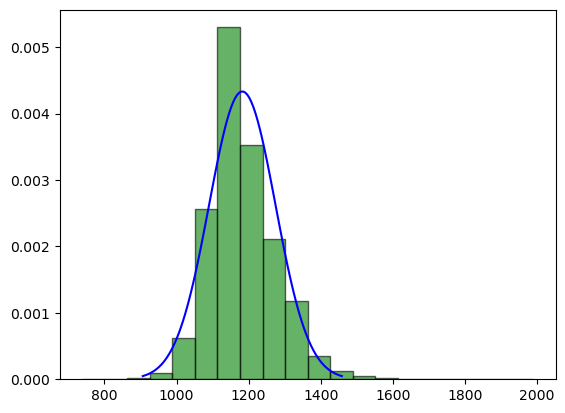

In [4]:
data = result_right['T1']
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='b')
plt.show()

# T1 values figs

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:8.954e-07 Stat=4.049e+04
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:1.046e-01 Stat=7.586e+03
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:1.573e-02 Stat=6.999e+03
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:2.877e-01 Stat=8.001e+03
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:9.656e-01 Stat=8.757e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:4.354e-02 Stat=7.293e+03
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:4.079e-04 Stat=4.452e+04
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

(<AxesSubplot:title={'center':'T1 values mean paired L / R'}, xlabel='Region', ylabel='T1'>,
  <statannotations.Annotation.Annotation at 0x7f16823cbd50>])

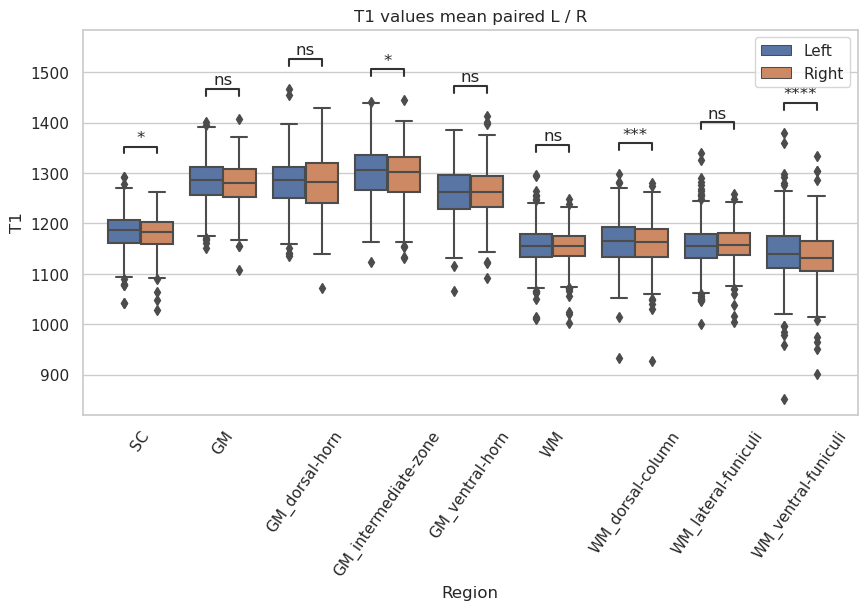

In [5]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)]

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.title("T1 values mean paired L / R")
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality") #, whis=np.inf)
plt.xticks(rotation=55)
plt.legend(loc='best')

pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

fasciculus-cuneatus_Left vs. fasciculus-cuneatus_Right: Wilcoxon test (paired samples), P_val:1.095e-03 Stat=4.779e+04
lateral-corticospinal_Left vs. lateral-corticospinal_Right: Wilcoxon test (paired samples), P_val:3.204e-01 Stat=5.470e+04
lateral-reticulospinal_Left vs. lateral-reticulospinal_Right: Wilcoxon test (paired samples), P_val:4.102e-01 Stat=4.175e+04
rubrospinal_Left vs. rubrospinal_Right: Wilcoxon test (paired samples), P_val:4.365e-01 Stat=5.535e+04
spinal-lemniscus-spinothalamic_Left vs. spinal-lemniscus-spinothalamic_Right: Wilcoxon test (paired samples), P_val:2.179e-02 Stat=5.074e+04
ventral-spinocerebellar_Left vs. ventral-spinocerebellar_Right: Wilcoxon test (paired samples), P_val:1.994e-02 Stat=5.064e+04
lateral-vestibulospinal_Left vs. lateral-vestibulospinal_Right: Wilcoxon test (pa

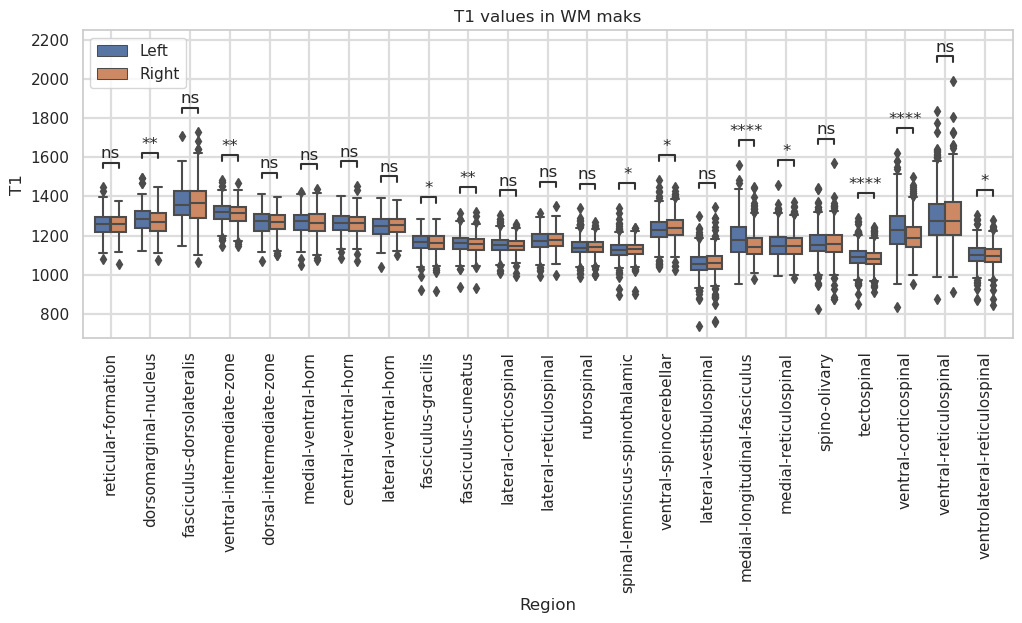

In [6]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn",
"fasciculus-gracilis" , "fasciculus-cuneatus", "lateral-corticospinal", "lateral-reticulospinal","rubrospinal",
"spinal-lemniscus-spinothalamic", "ventral-spinocerebellar", "lateral-vestibulospinal", "medial-longitudinal-fasciculus" ,
"medial-reticulospinal", "spino-olivary","tectospinal","ventral-corticospinal", "ventral-reticulospinal",
                            "ventrolateral-reticulospinal"]
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)]
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
plt.title("T1 values in WM maks")
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality") #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
plt.legend(loc='best')

pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    (("fasciculus-gracilis","Left"), ("fasciculus-gracilis","Right")),
    (("fasciculus-cuneatus","Left"), ("fasciculus-cuneatus","Right")),
    (("lateral-corticospinal","Left"), ("lateral-corticospinal","Right")),
    (("lateral-reticulospinal","Left"), ("lateral-reticulospinal","Right")),
    (("rubrospinal","Left"), ("rubrospinal","Right")),
    (("spinal-lemniscus-spinothalamic","Left"), ("spinal-lemniscus-spinothalamic","Right")),
    (("ventral-spinocerebellar","Left"), ("ventral-spinocerebellar","Right")),
    (("lateral-vestibulospinal","Left"), ("lateral-vestibulospinal","Right")),
    (("medial-longitudinal-fasciculus","Left"), ("medial-longitudinal-fasciculus","Right")),
    (("medial-reticulospinal","Left"), ("medial-reticulospinal","Right")),
    (("spino-olivary","Left"), ("spino-olivary","Right")),
    (("tectospinal","Left"), ("tectospinal","Right")),
    (("ventral-corticospinal","Left"), ("ventral-corticospinal","Right")),
    (("ventral-reticulospinal","Left"), ("ventral-reticulospinal","Right")),
    (("ventrolateral-reticulospinal","Left"), ("ventrolateral-reticulospinal","Right"))]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/fig02.pdf')

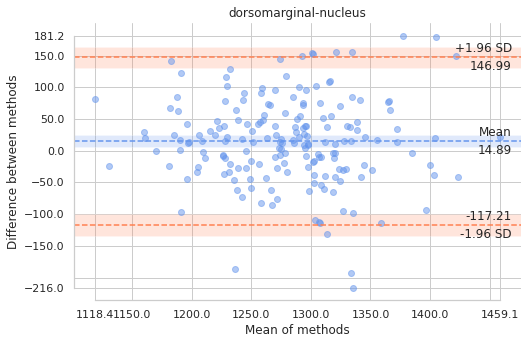

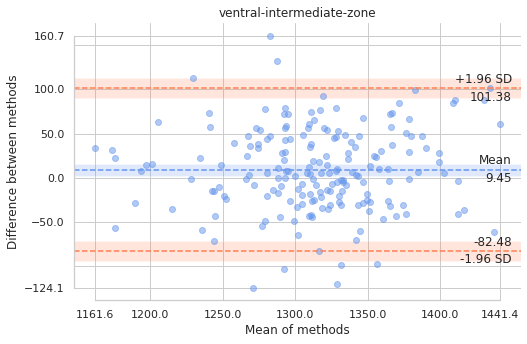

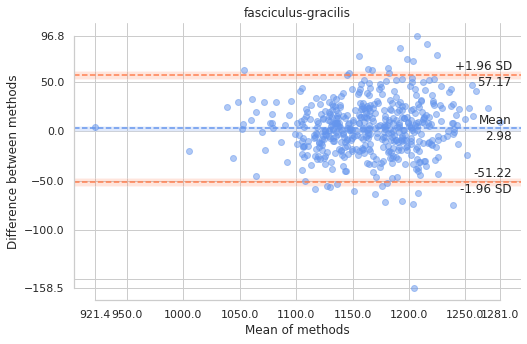

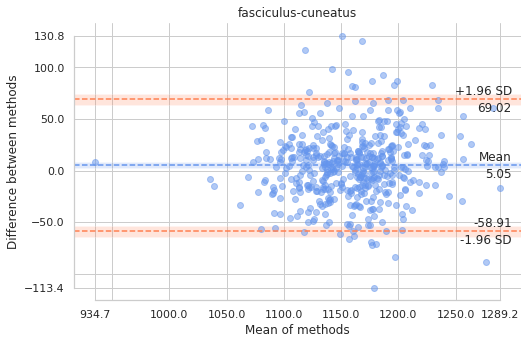

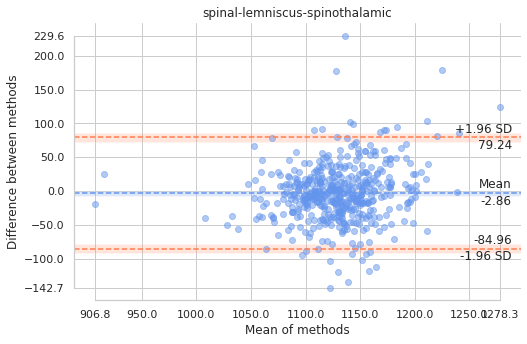

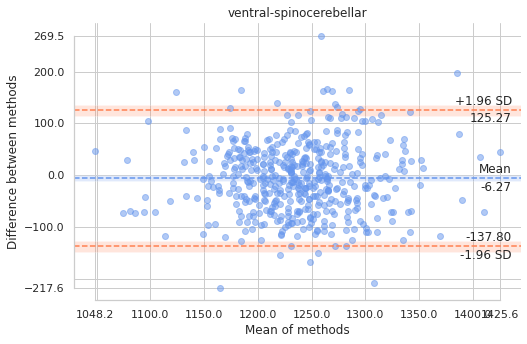

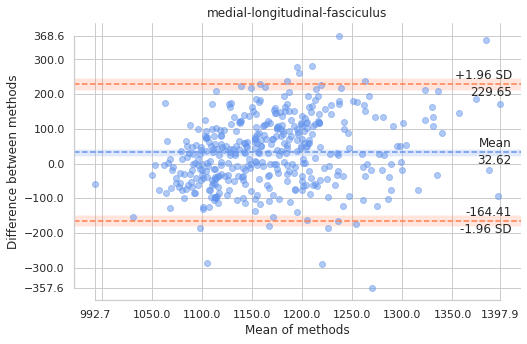

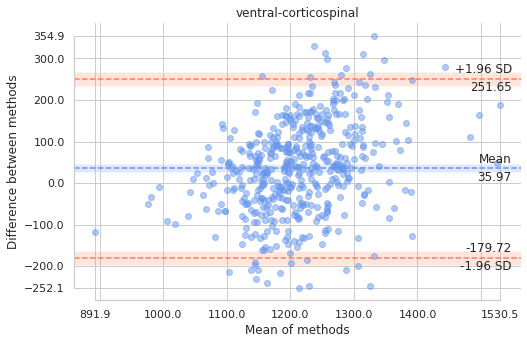

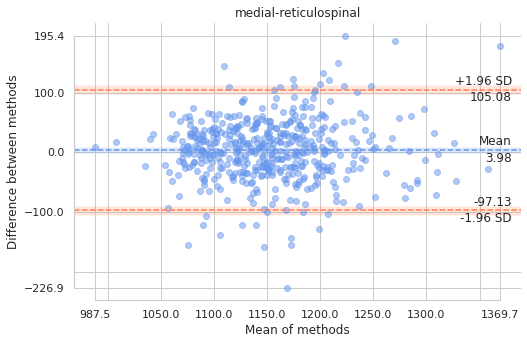

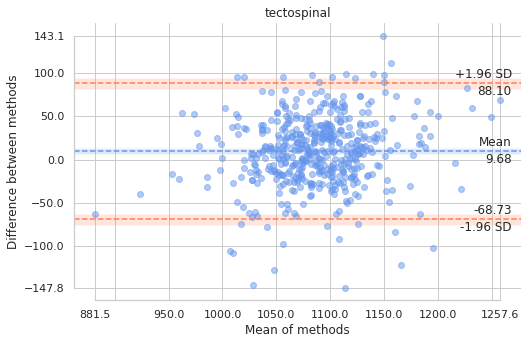

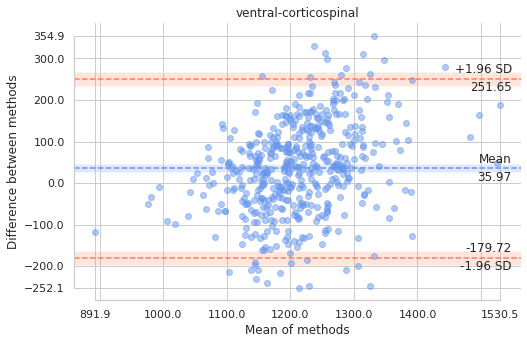

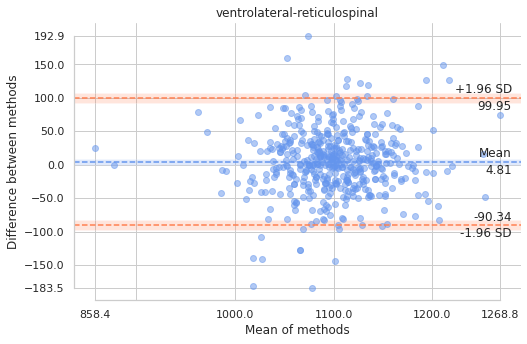

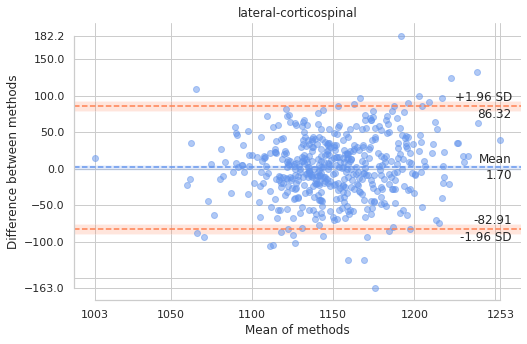

In [7]:
result = result_right
result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "dorsomarginal-nucleus"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "dorsomarginal-nucleus"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'dorsomarginal-nucleus')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-intermediate-zone"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-intermediate-zone"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-intermediate-zone')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "fasciculus-gracilis"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "fasciculus-gracilis"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'fasciculus-gracilis')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "fasciculus-cuneatus"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "fasciculus-cuneatus"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'fasciculus-cuneatus')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "spinal-lemniscus-spinothalamic"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "spinal-lemniscus-spinothalamic"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'spinal-lemniscus-spinothalamic')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-spinocerebellar"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-spinocerebellar"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-spinocerebellar')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "medial-longitudinal-fasciculus"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "medial-longitudinal-fasciculus"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'medial-longitudinal-fasciculus')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-corticospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-corticospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "medial-reticulospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "medial-reticulospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'medial-reticulospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "tectospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "tectospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'tectospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-corticospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-corticospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventrolateral-reticulospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventrolateral-reticulospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventrolateral-reticulospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "lateral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "lateral-corticospinal"]
method1 = result_left_re['T1']
method2 = result_right_re['T1']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'lateral-corticospinal')

# Area figs

In [10]:
df1 = data_right
df_left = df1.filter(['Size voxels left','Subject','Slice','Slab','Region','Class'], axis=1)
df_left.insert(0, 'Laterality', 'Left')
df_left.rename(columns={'Size voxels left': 'voxels'}, inplace=True)
df_right = df1.filter(['Size voxels right','Subject','Slice','Slab','Region','Class'], axis=1)
df_right.insert(0, 'Laterality', 'Right')
df_right.rename(columns={'Size voxels right': 'voxels'}, inplace=True)

frames = [df_left, df_right]
result_right = pd.concat(frames, axis=0)
result_right['Region'] = result_right['Region'].replace('ventral-horn', 'GM_ventral-horn')
result_right['Region'] = result_right['Region'].replace('intermediate-zone', 'GM_intermediate-zone')
result_right['Region'] = result_right['Region'].replace('dorsal-horn', 'GM_dorsal-horn')
result_right['Region'] = result_right['Region'].replace('dorsal-column', 'WM_dorsal-column')
result_right['Region'] = result_right['Region'].replace('lateral-funiculi', 'WM_lateral-funiculi')
result_right['Region'] = result_right['Region'].replace('ventral-funiculi', 'WM_ventral-funiculi')
result_right['area'] = result_right['voxels'] * 0.3 * 0.3
result_right

,Laterality,voxels,Subject,Slab,Region,Class,area
0,Left,249.346973,sub-001,run-2,SC,SC,22.441228
1,Left,262.658554,sub-001,run-2,SC,SC,23.639270
2,Left,276.676814,sub-001,run-2,SC,SC,24.900913
3,Left,297.490124,sub-001,run-2,SC,SC,26.774111
4,Left,335.124863,sub-001,run-2,SC,SC,30.161238
...,...,...,...,...,...,...,...
11368,Right,9.178492,sub-026,run-2,ventrolateral-reticulospinal,WM,0.826064
11369,Right,3.731782,sub-026,run-1,ventrolateral-reticulospinal,WM,0.335860
11370,Right,4.022504,sub-026,run-1,ventrolateral-reticulospinal,WM,0.362025
11371,Right,3.176561,sub-026,run-1,ventrolateral-reticulospinal,WM,0.285890


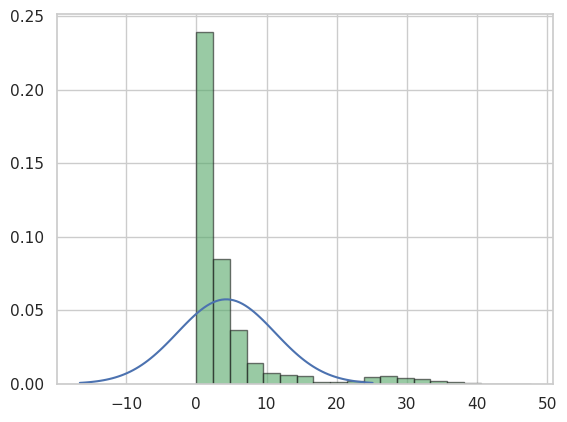

In [11]:
data = result_right['area']
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='b')
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:4.174e-03 Stat=4.649e+04
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:3.213e-01 Stat=8.054e+03
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:3.058e-01 Stat=8.030e+03
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:6.659e-01 Stat=8.469e+03
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:7.946e-01 Stat=8.596e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:5.981e-02 Stat=7.394e+03
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:6.175e-03 Stat=4.686e+04
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

(<AxesSubplot:title={'center':'T1 values mean paired L / R'}, xlabel='Region', ylabel='area'>,
  <statannotations.Annotation.Annotation at 0x7f16826fc910>])

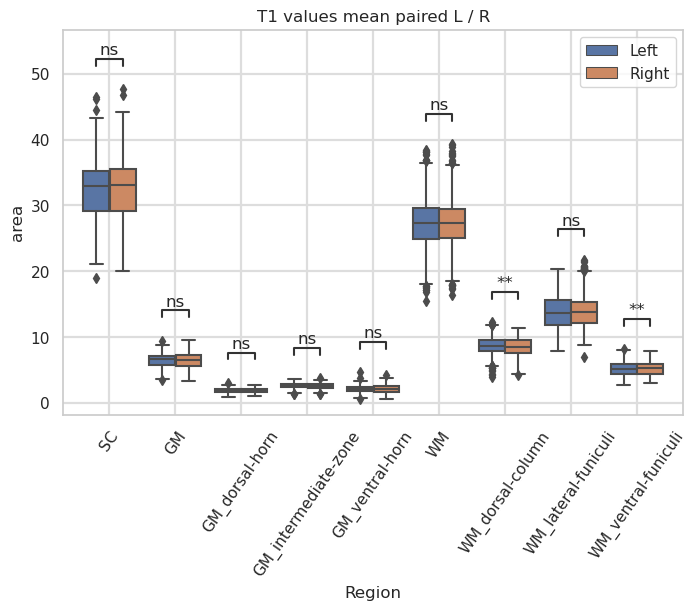

In [12]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,5))
plt.title("T1 values mean paired L / R")

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality") #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
plt.legend(loc='best')

pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

fasciculus-cuneatus_Left vs. fasciculus-cuneatus_Right: Wilcoxon test (paired samples), P_val:5.481e-02 Stat=5.188e+04
lateral-corticospinal_Left vs. lateral-corticospinal_Right: Wilcoxon test (paired samples), P_val:1.138e-03 Stat=4.783e+04
lateral-reticulospinal_Left vs. lateral-reticulospinal_Right: Wilcoxon test (paired samples), P_val:2.162e-01 Stat=4.073e+04
rubrospinal_Left vs. rubrospinal_Right: Wilcoxon test (paired samples), P_val:6.483e-01 Stat=5.633e+04
spinal-lemniscus-spinothalamic_Left vs. spinal-lemniscus-spinothalamic_Right: Wilcoxon test (paired samples), P_val:8.722e-01 Stat=5.723e+04
ventral-spinocerebellar_Left vs. ventral-spinocerebellar_Right: Wilcoxon test (paired samples), P_val:7.133e-19 Stat=3.074e+04
lateral-vestibulospinal_Left vs. lateral-vestibulospinal_Right: Wilcoxon test (pa

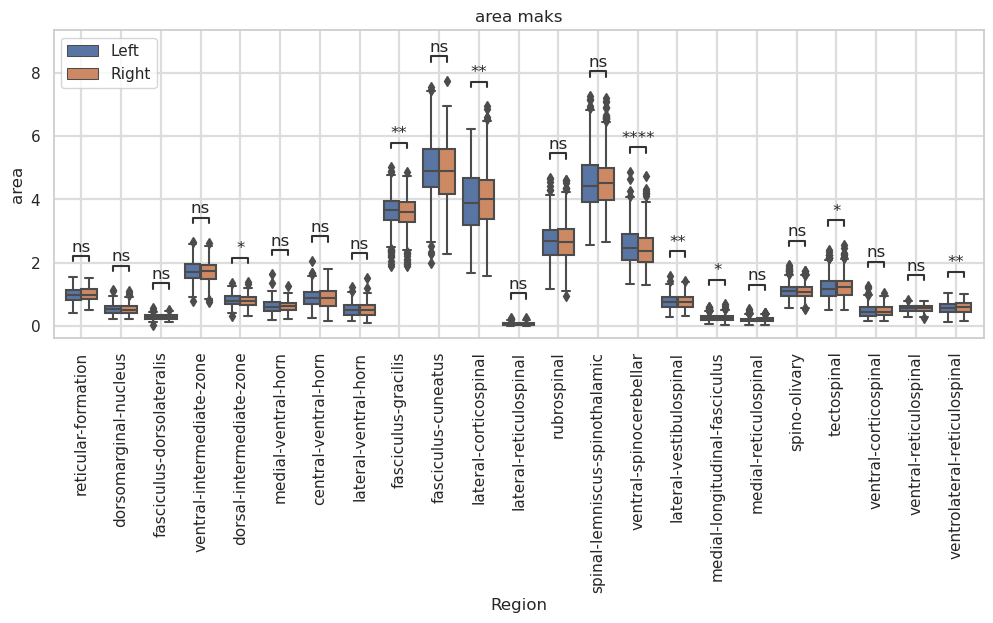

In [13]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn",
"fasciculus-gracilis" , "fasciculus-cuneatus", "lateral-corticospinal", "lateral-reticulospinal","rubrospinal",
"spinal-lemniscus-spinothalamic", "ventral-spinocerebellar", "lateral-vestibulospinal", "medial-longitudinal-fasciculus" ,
"medial-reticulospinal", "spino-olivary","tectospinal","ventral-corticospinal", "ventral-reticulospinal",
                            "ventrolateral-reticulospinal"]
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)]
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
plt.title("area maks")
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality") #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
plt.legend(loc='upper left')

pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    (("fasciculus-gracilis","Left"), ("fasciculus-gracilis","Right")),
    (("fasciculus-cuneatus","Left"), ("fasciculus-cuneatus","Right")),
    (("lateral-corticospinal","Left"), ("lateral-corticospinal","Right")),
    (("lateral-reticulospinal","Left"), ("lateral-reticulospinal","Right")),
    (("rubrospinal","Left"), ("rubrospinal","Right")),
    (("spinal-lemniscus-spinothalamic","Left"), ("spinal-lemniscus-spinothalamic","Right")),
    (("ventral-spinocerebellar","Left"), ("ventral-spinocerebellar","Right")),
    (("lateral-vestibulospinal","Left"), ("lateral-vestibulospinal","Right")),
    (("medial-longitudinal-fasciculus","Left"), ("medial-longitudinal-fasciculus","Right")),
    (("medial-reticulospinal","Left"), ("medial-reticulospinal","Right")),
    (("spino-olivary","Left"), ("spino-olivary","Right")),
    (("tectospinal","Left"), ("tectospinal","Right")),
    (("ventral-corticospinal","Left"), ("ventral-corticospinal","Right")),
    (("ventral-reticulospinal","Left"), ("ventral-reticulospinal","Right")),
    (("ventrolateral-reticulospinal","Left"), ("ventrolateral-reticulospinal","Right"))]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/fig02.pdf')

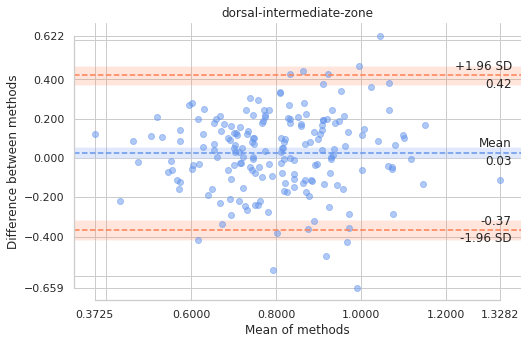

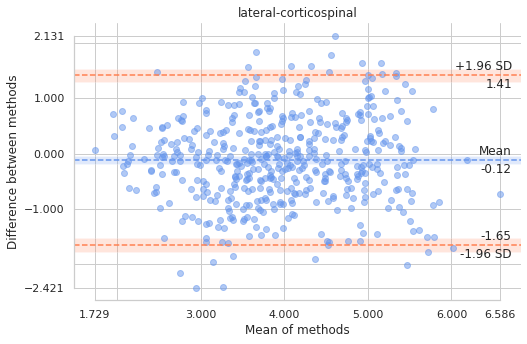

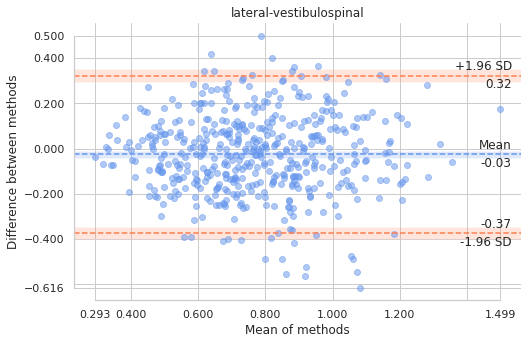

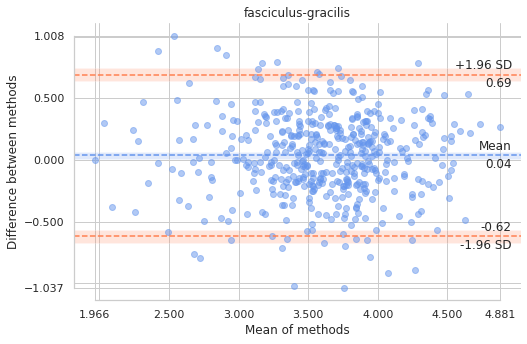

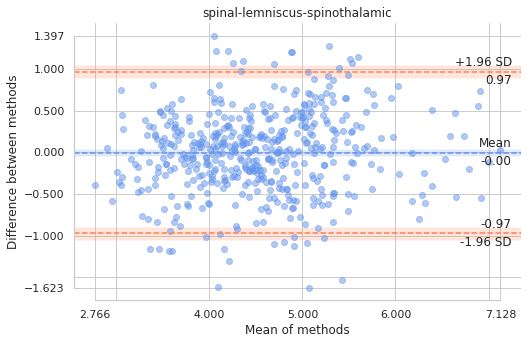

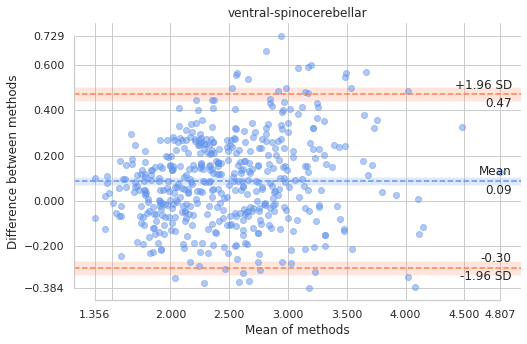

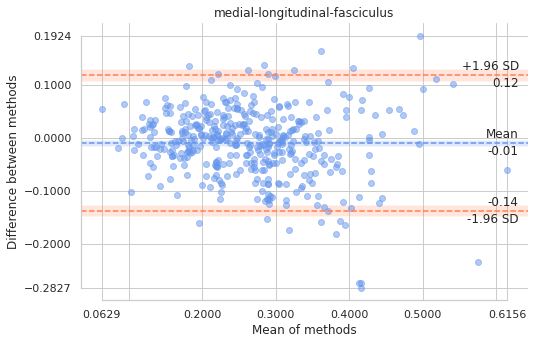

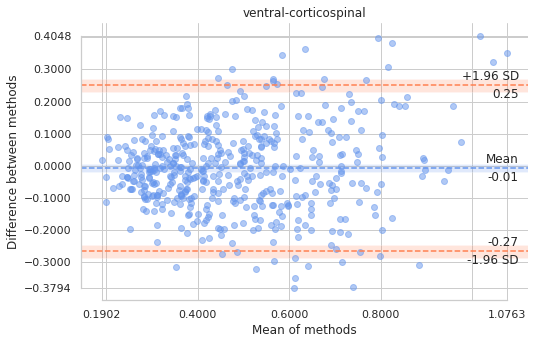

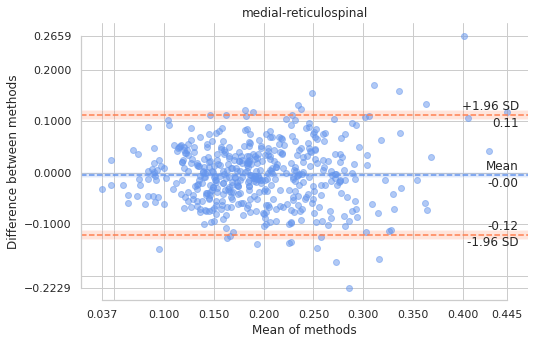

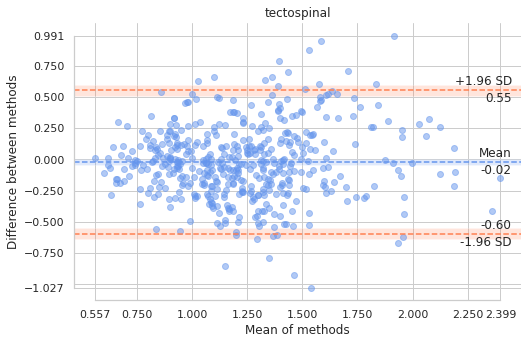

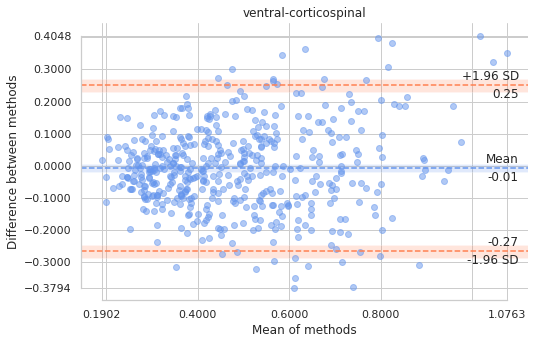

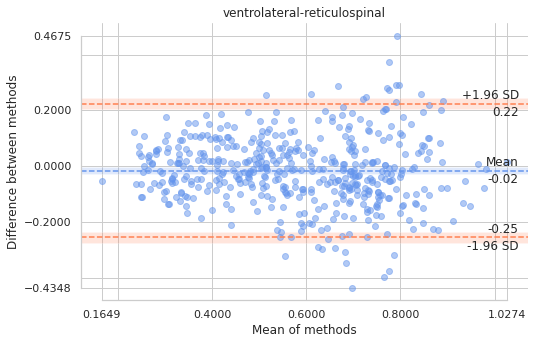

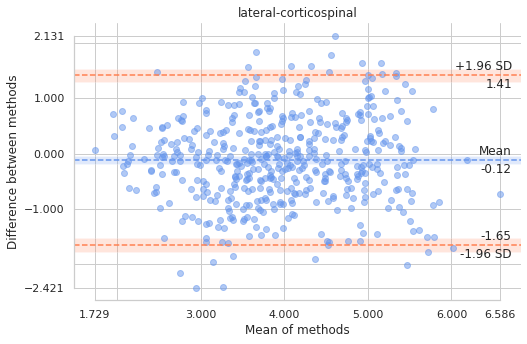

In [14]:
result = result_right
result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "dorsal-intermediate-zone"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "dorsal-intermediate-zone"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'dorsal-intermediate-zone')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "lateral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "lateral-corticospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'lateral-corticospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "lateral-vestibulospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "lateral-vestibulospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'lateral-vestibulospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "fasciculus-gracilis"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "fasciculus-gracilis"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'fasciculus-gracilis')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "spinal-lemniscus-spinothalamic"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "spinal-lemniscus-spinothalamic"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'spinal-lemniscus-spinothalamic')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-spinocerebellar"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-spinocerebellar"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-spinocerebellar')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "medial-longitudinal-fasciculus"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "medial-longitudinal-fasciculus"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'medial-longitudinal-fasciculus')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-corticospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-corticospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "medial-reticulospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "medial-reticulospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'medial-reticulospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "tectospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "tectospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'tectospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventral-corticospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventral-corticospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "ventrolateral-reticulospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "ventrolateral-reticulospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'ventrolateral-reticulospinal')

result_left = result[result['Laterality'] == 'Left']
result_left_re = result_left[result_left["Region"] == "lateral-corticospinal"]
result_right = result[result['Laterality'] == 'Right']
result_right_re = result_right[result_right["Region"] == "lateral-corticospinal"]
method1 = result_left_re['area']
method2 = result_right_re['area']
pyCompare.blandAltman(method1, method2, figureSize=((8,5)), title = 'lateral-corticospinal')